In [64]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import collections

In [65]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
datadir = './'
adult_fn = 'adult.data'
adult_test_fn = 'adult.test'
adult_col = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','y']

In [68]:
adult = pd.read_csv(datadir + adult_fn, sep=', ', header=None, names=adult_col, skiprows=None, na_values='?', keep_default_na=False, engine='python')

In [69]:
adult.shape

(32561, 15)

In [6]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
y                    0
dtype: int64

In [7]:
adult.dropna(axis=0, how='any', inplace=True)

In [8]:
adult.shape

(30162, 15)

In [9]:
# python 2
categorical_cols = adult.columns[map(lambda x:x==np.object, adult.dtypes)]
categorical_features = filter(lambda x:x!='y', categorical_cols)
numerical_cols = adult.columns[map(lambda x:x!=np.object, adult.dtypes)]

In [ ]:
# python 3
is_categorical = list(map(lambda x:x==np.object, adult.dtypes))
categorical_cols = [adult.columns[i] for i in range(len(is_categorical)) if is_categorical[i]]
categorical_features = filter(lambda x:x!='y', categorical_cols)
numerical_cols = [adult.columns[i] for i in range(len(is_categorical)) if not is_categorical[i]]

In [72]:
categorical_cols, categorical_features, numerical_cols

(Index([u'workclass', u'education', u'marital_status', u'occupation',
        u'relationship', u'race', u'sex', u'native_country', u'y'],
       dtype='object'),
 ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country'],
 Index([u'age', u'fnlwgt', u'education_num', u'capital_gain', u'capital_loss',
        u'hours_per_week'],
       dtype='object'))

In [10]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0D2780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019A90B38>]], dtype=object)

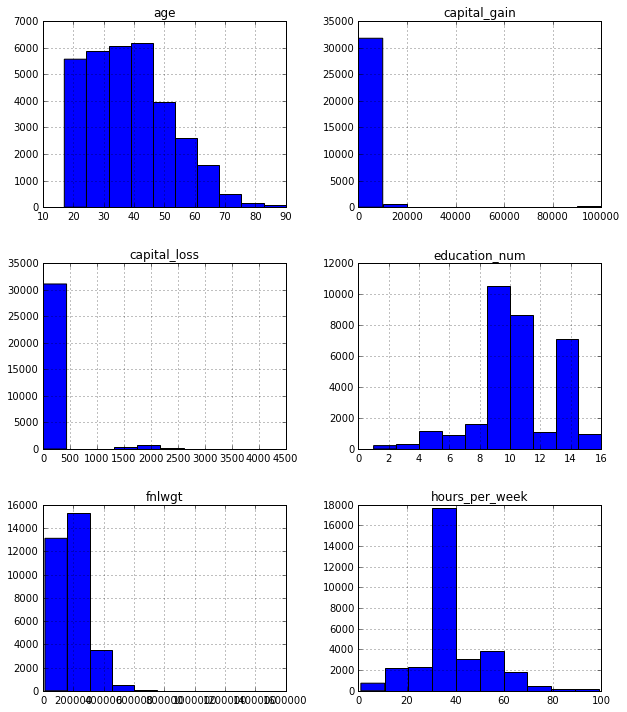

In [99]:
adult.hist(figsize=(10, 12))

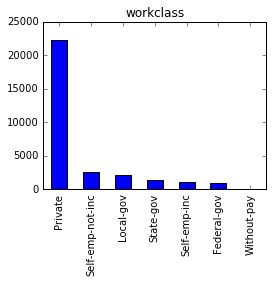

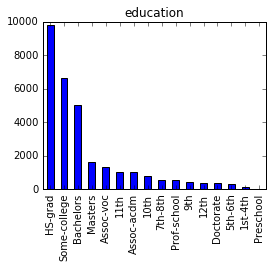

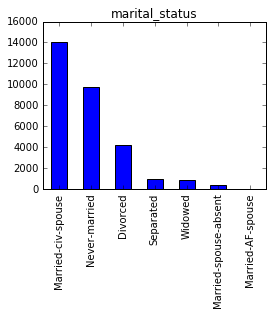

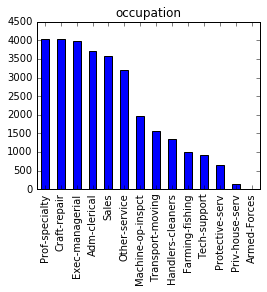

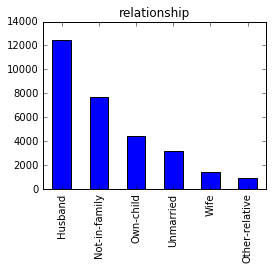

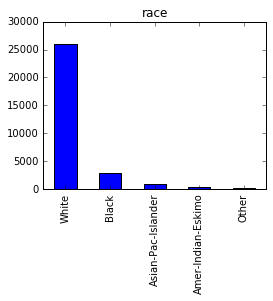

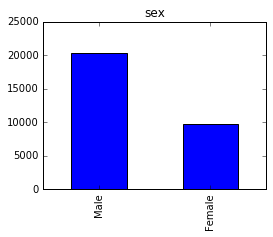

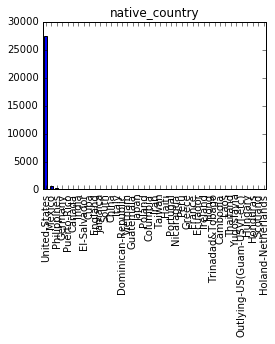

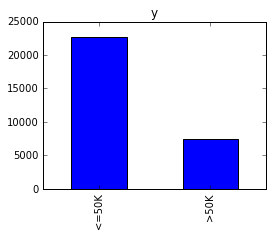

In [12]:
for col in categorical_cols:
    adult[col].value_counts().plot(kind='bar', figsize=(4, 3))        
    plt.title(col)
    plt.show()

In [13]:
adult_test = pd.read_csv(datadir + adult_test_fn, sep=', ', header=None, names=adult_col, skiprows=[0], na_values='?', keep_default_na=False, engine='python')

In [14]:
adult_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [15]:
adult_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
y                   0
dtype: int64

In [16]:
adult_test.dropna(axis=0, how='any', inplace=True)

In [82]:
for col in categorical_cols:
    x = np.unique(adult[col])
    y = np.unique(adult_test[col])
    print col, len(x), len(y), np.sum(np.logical_not(np.in1d(y, x)))

workclass 9 7 0
education 16 16 0
marital_status 7 7 0
occupation 15 14 0
relationship 6 6 0
race 5 5 0
sex 2 2 0
native_country 42 40 0
y 2 2 2


In [17]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics

# calculate features

In [26]:
scores = DataFrame({}, index=['precision', 'recall', 'f1', 'accuracy', 'auc'])

In [27]:
dat = adult[filter(lambda x:x!='y', adult.columns)]
tdat = adult_test[dat.columns]

In [28]:
# def fit_encoder(dat, categorical_features):
#     lbenc = collections.defaultdict(LabelEncoder)
#     fit = dat[categorical_features].apply(lambda x: lbenc[x.name].fit_transform(x))
#     ohenc = OneHotEncoder()
#     ohenc.fit(fit)
#     return lbenc, ohenc
# lbenc, ohenc = fit_encoder(dat, categorical_features)
# def one_hot_encoding(dat, categorical_features, lbenc, ohenc):
#     fit = dat[categorical_features].apply(lambda x: lbenc[x.name].transform(x))
#     xfit = DataFrame(ohenc.transform(fit).toarray(), index=dat.index, )
#     dat.drop(categorical_features, axis=1, inplace=True)
#     dat = pd.concat([dat, xfit], axis=1)
#     return dat

In [29]:
def one_hot_encoding(dat, tdat, categorical_features):
    ndat = dat.shape[0]
    ntdat = tdat.shape[0]
    df = pd.concat([dat, tdat], axis=0)
    df = pd.get_dummies(df)
    dat = df.iloc[:ndat]
    tdat = df.iloc[ndat:]
    return dat, tdat

In [30]:
def predict(model, tdat):
    py_prob = model.predict_proba(tdat)[:, 1]
    py = model.predict(tdat)
    return py, py_prob

In [31]:
def calc_scores(ty, py, py_prob=[]):
    s = Series()
    s['precision'] = metrics.precision_score(ty, py)
    s['recall'] = metrics.recall_score(ty, py)
    s['f1'] = metrics.f1_score(ty, py)
    s['accuracy'] = metrics.accuracy_score(ty, py)
    s['auc'] = np.nan if len(py_prob) == 0 else metrics.roc_auc_score(ty, py_prob)
    return s

In [32]:
#metrics.roc_auc_score?

In [33]:
dat, tdat = one_hot_encoding(dat, tdat, categorical_features)

In [34]:
dat.shape, tdat.shape

((30162, 104), (15060, 104))

In [35]:
dat.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
y = (adult['y'] == '>50K').astype(int)
ty = (adult_test['y'] == '>50K.').astype(int)

In [37]:
adult_test['y'].value_counts()

<=50K.    11360
>50K.      3700
Name: y, dtype: int64

In [38]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [39]:
rf.fit(dat, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
py_prob = rf.predict_proba(tdat)[:, 1]
py_p = py_prob >= np.percentile(py_prob, 100*(1 - sum(y)*1.0/y.shape[0] ) )

In [41]:
py = rf.predict(tdat)

In [42]:
sum(py), py.shape, sum(y), y.shape, sum(py_p), sum(ty), ty.shape

(3182, (15060L,), 7508, (30162L,), 3828, 3700, (15060L,))

In [43]:
scores['rf'] = calc_scores(ty, py, py_prob)

In [44]:
scores

,rf
precision,0.714016
recall,0.614054
f1,0.660273
accuracy,0.844754
auc,0.898466


In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(dat, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
py, py_prob = predict(dt, tdat)

In [48]:
sum(py), py.shape, sum(y), y.shape, sum(ty), ty.shape

(3811, (15060L,), 7508, (30162L,), 3700, (15060L,))

In [49]:
scores['dt'] = calc_scores(ty, py, py_prob)

In [50]:
scores

,rf,dt
precision,0.714016,0.598531
recall,0.614054,0.616486
f1,0.660273,0.607376
accuracy,0.844754,0.804183
auc,0.898466,0.740902
